# Install required packages

In [1]:
!pip install imbalanced-learn


In [2]:

!pip install featurewiz

# Importing libraries

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import os
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour
from sklearn.utils import class_weight
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix,  classification_report,f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score,RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.neural_network import MLPClassifier
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

# Reading the dataset

In [4]:
df=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\beans-230710-125232 (1).csv")

In [5]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,NaN,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,NaN,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,NaN,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [6]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

There are 7 unique target classes

# Get Data Summary

In [7]:
df.describe(percentiles=[.25, .5, .75, 0.995]).T

,count,mean,std,min,25%,50%,75%,99.5%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,200711.400000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1716.395500,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,651.184245,738.860153
MinorAxisLength,12577.0,202.295543,45.044880,122.512653,175.755083,192.426897,217.081036,400.872277,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.247550,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.895566,0.911423
ConvexArea,12808.0,53726.689413,29842.557030,20684.000000,36684.750000,45106.000000,62307.000000,203762.310000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,505.523186,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.831485,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.993305,0.994677


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  12577 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       12808 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      12223 non-null  float64
 12  ShapeFactor1     13080 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     12563 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [9]:
df.isnull().sum()

Area                  0
Perimeter             0
MajorAxisLength       0
MinorAxisLength    1034
AspectRation          0
Eccentricity          0
ConvexArea          803
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness        1388
ShapeFactor1        531
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4       1048
Class                 0
dtype: int64

<Axes: >

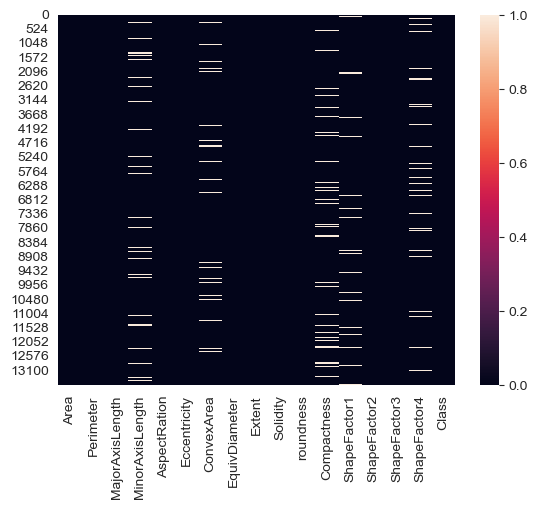

In [10]:
sns.heatmap(df.isnull())

Missing values handling

In [11]:
df.interpolate(inplace=True)


<Axes: >

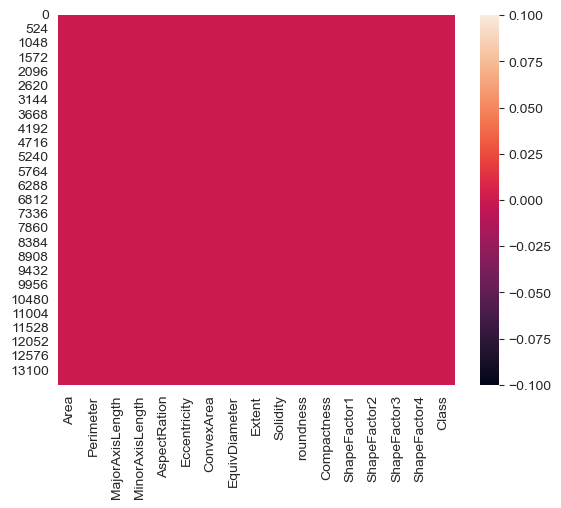

In [12]:
sns.heatmap(df.isnull())

# Exploratory Data Analysis

# Visualisation for target column

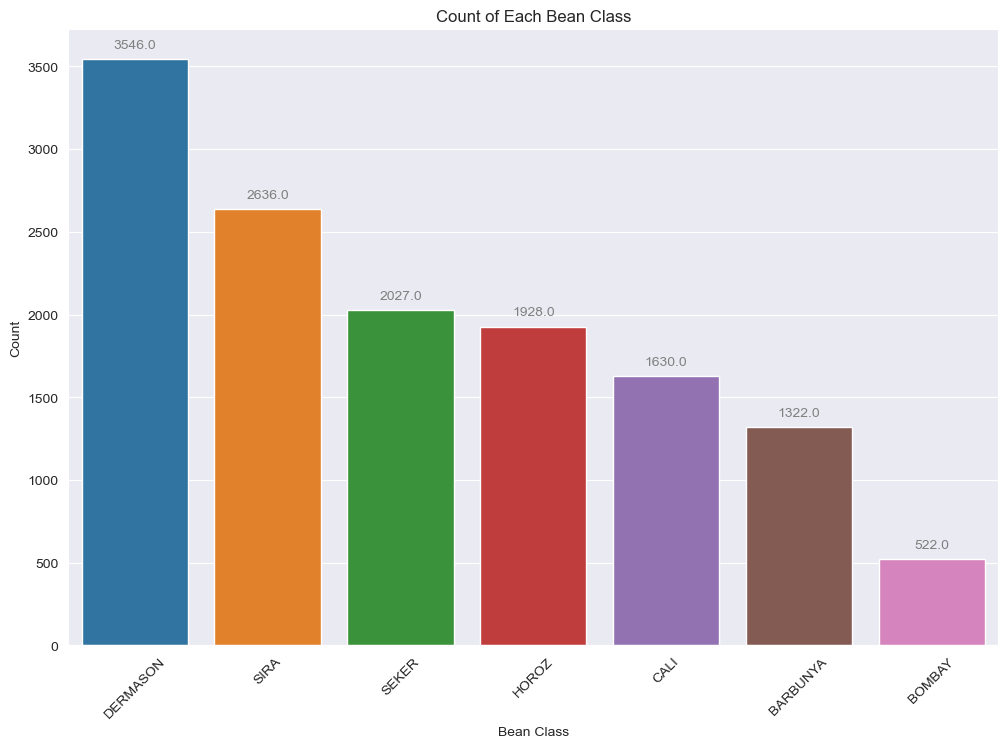

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class
class_counts = df['Class'].value_counts()

plt.figure(figsize=(12, 8))
cp = sns.barplot(x=class_counts.index, y=class_counts.values)
cp.set_title("Count of Each Bean Class")
cp.set_xlabel("Bean Class")
cp.set_ylabel("Count")

# Add count labels on top of the bars
for p in cp.patches:
    cp.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='gray', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)
plt.show()


# Checking for outliers

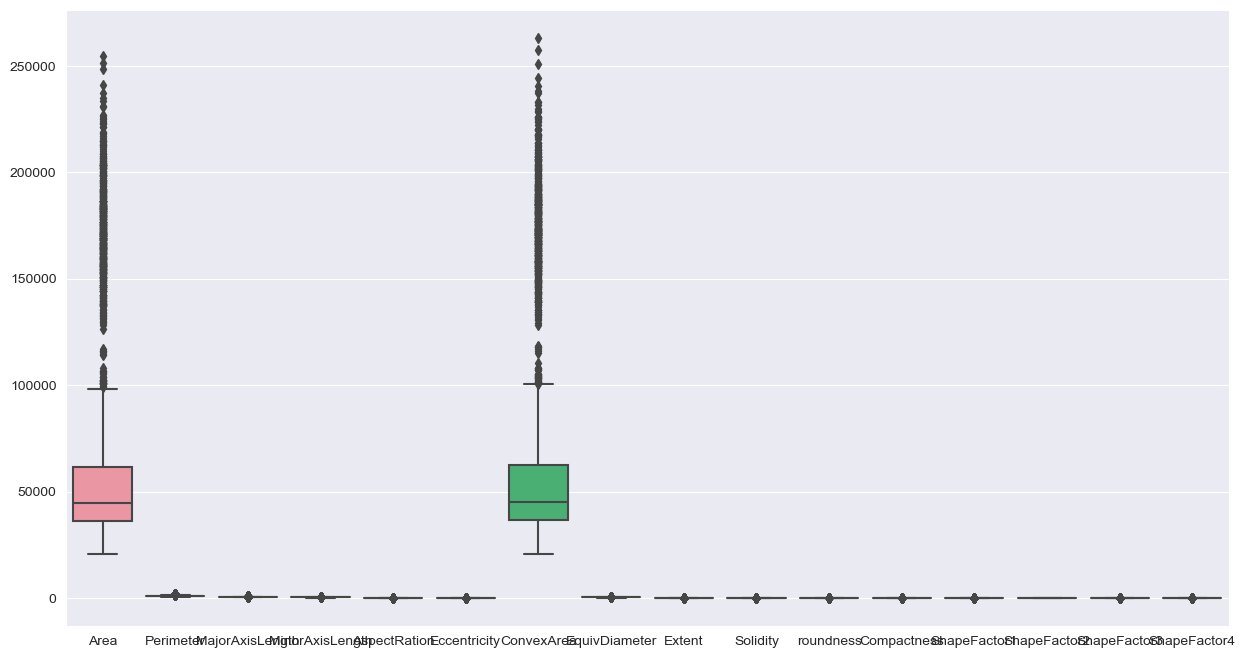

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.show()


We can see that there are outliers in the data. We need to treat them.

In [15]:
#Treating the outliers
num=df.select_dtypes(include=np.number)
num.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [16]:
def boundaries(data,variable):
    LL=(data[variable].quantile(.25))-(((data[variable].quantile(.75))-(data[variable].quantile(.25)))*1.5)
    UL=(data[variable].quantile(.75))+(((data[variable].quantile(.75))-(data[variable].quantile(.25)))*1.5)
    return LL,UL

In [17]:
cols=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

In [18]:
for col in cols:
    LL,UL=boundaries(df,col)
    
    df[col]=np.where(df[col]<LL,LL,
                         np.where(df[col]>UL,UL,df[col]))

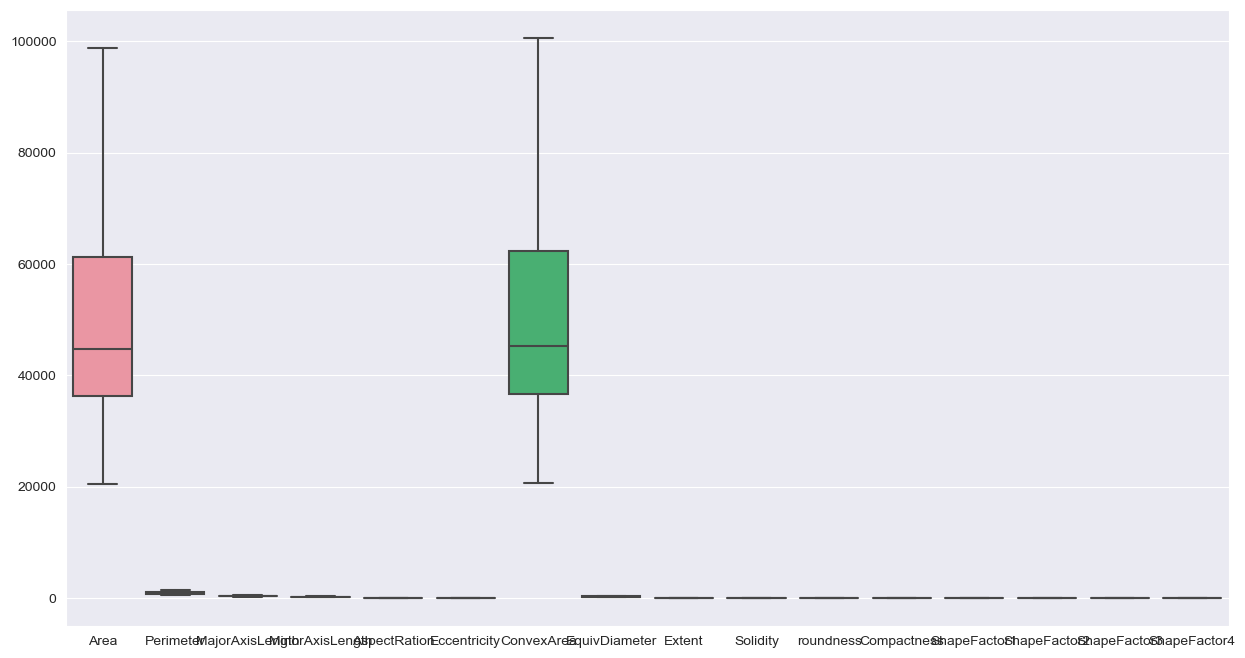

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.show()

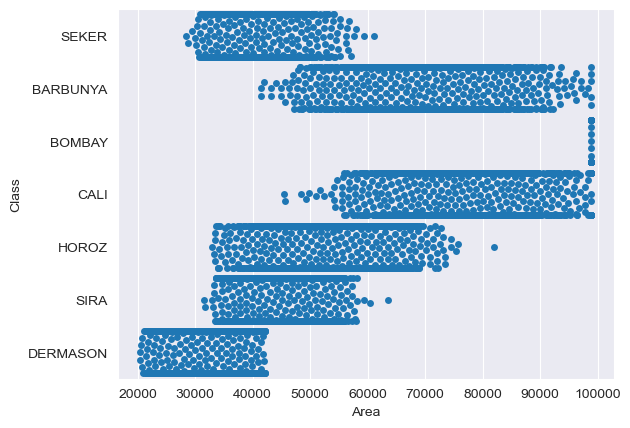

In [55]:
sns.swarmplot(x='Area',y='Class',data=df)
plt.show()

# Testing for Linearity

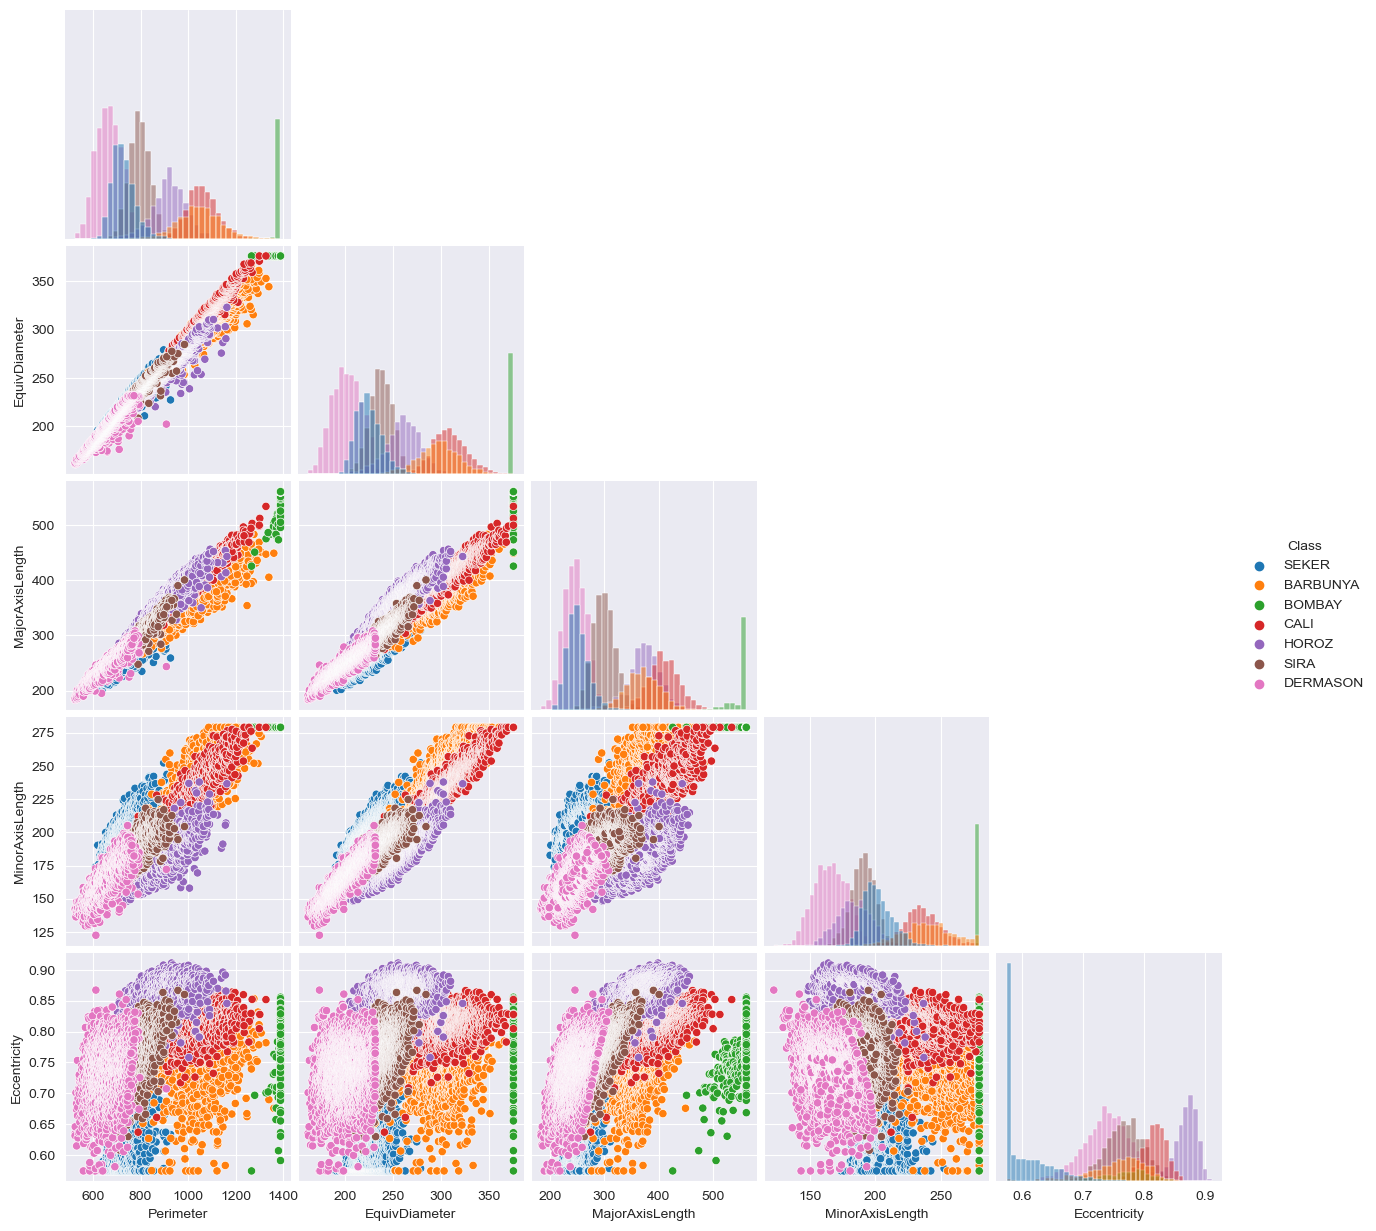

In [56]:
sns.pairplot(df,vars=['Perimeter','EquivDiameter','MajorAxisLength','MinorAxisLength','Eccentricity'],hue='Class',diag_kind='hist',corner=True)
plt.show()

# Coorelation Check

In [57]:
vcorr=df.corr()

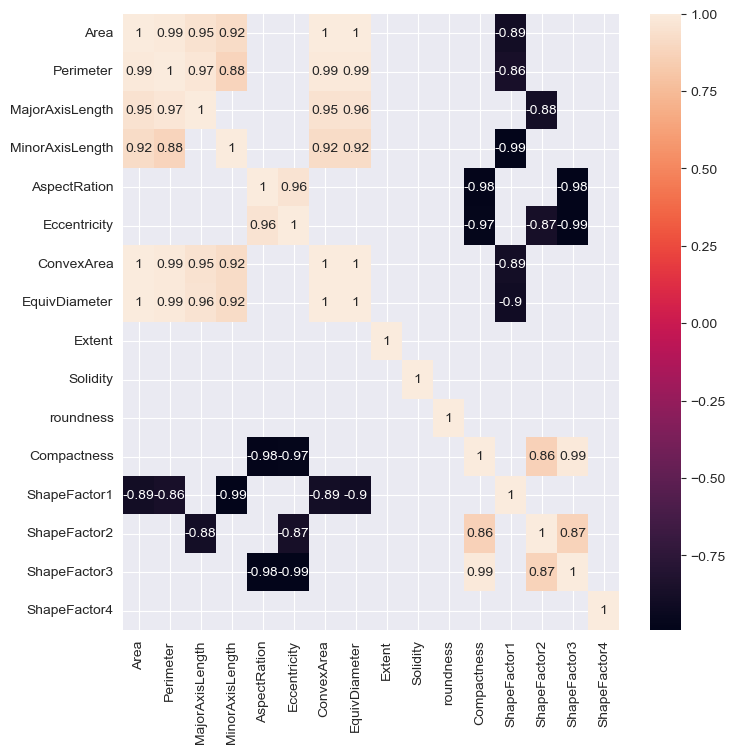

In [58]:
plt.figure(figsize=(8,8))
sns.heatmap(vcorr[(vcorr>0.85) | (vcorr<-0.85)],annot=True)
plt.show()

We can find that there are many variables which have a strong correlation.

We can reduce the dimensionality using PCA

# Test for Normality

In [59]:
cols=df.select_dtypes(include=np.number)
cols.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

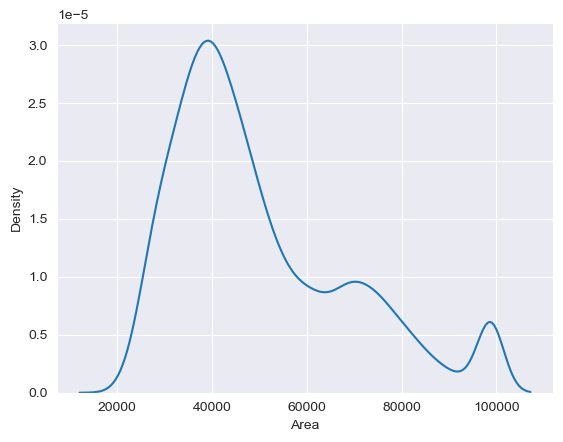

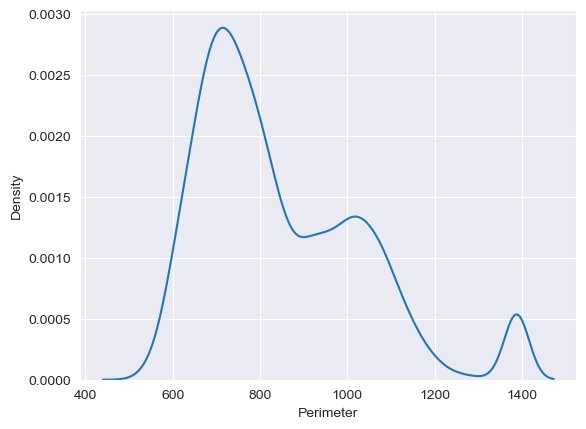

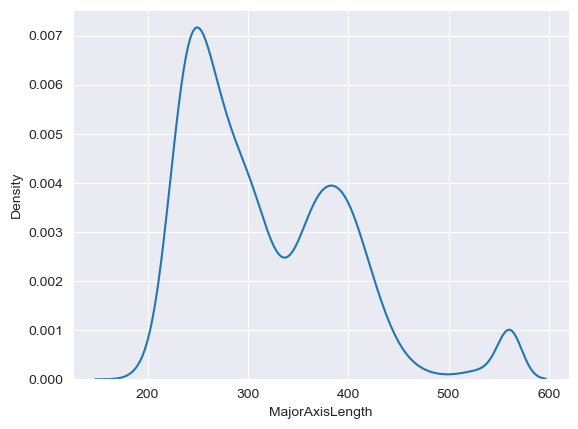

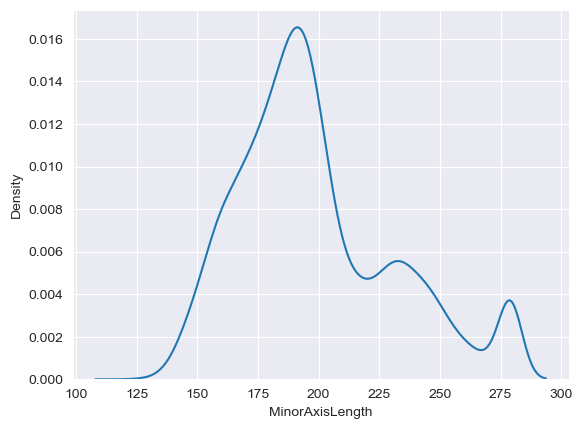

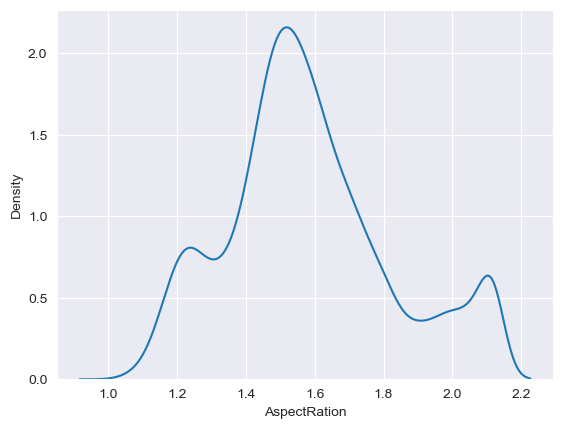

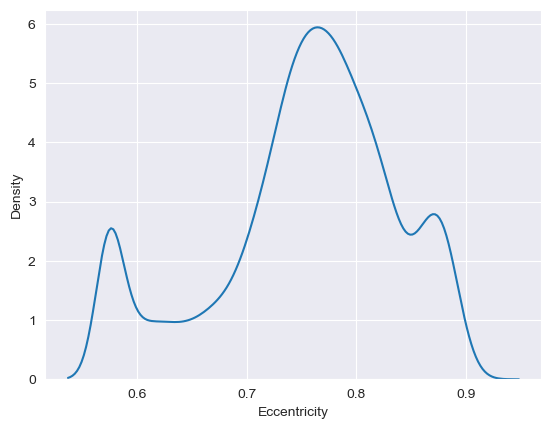

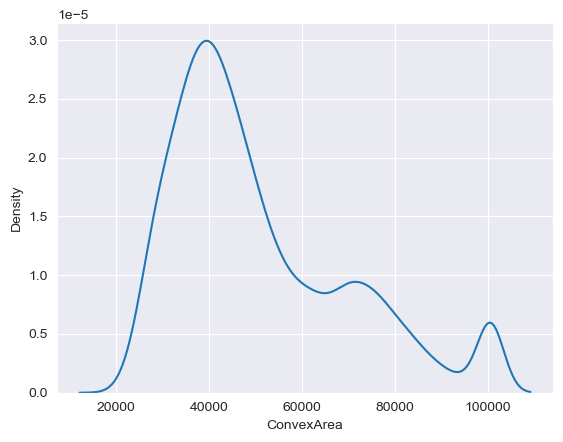

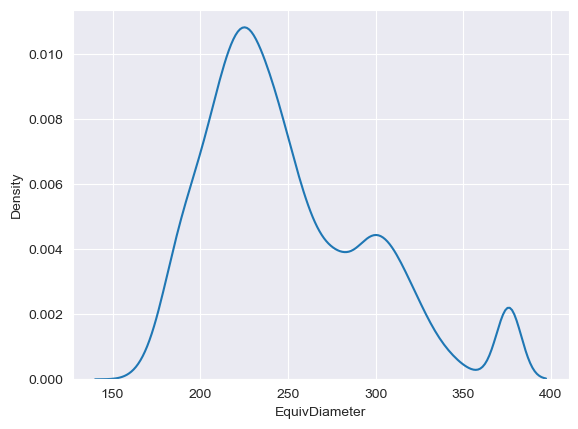

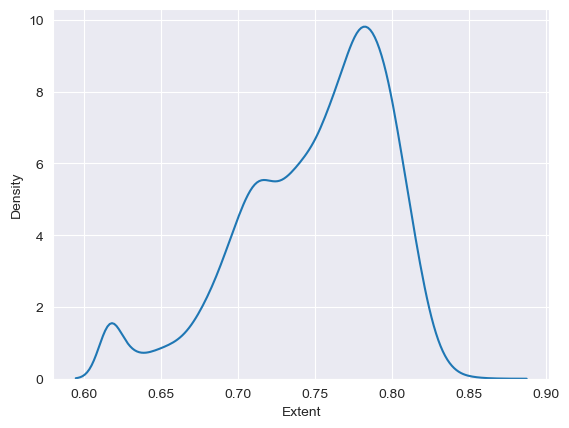

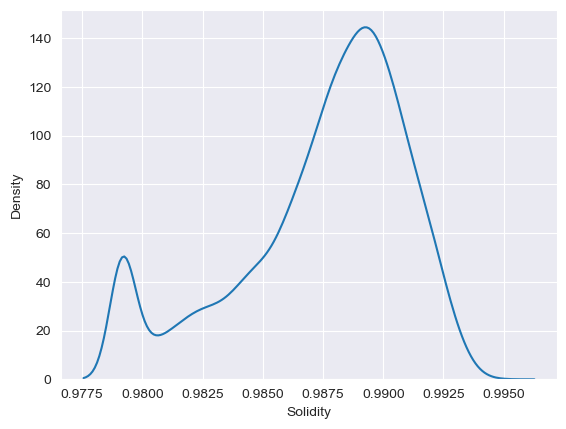

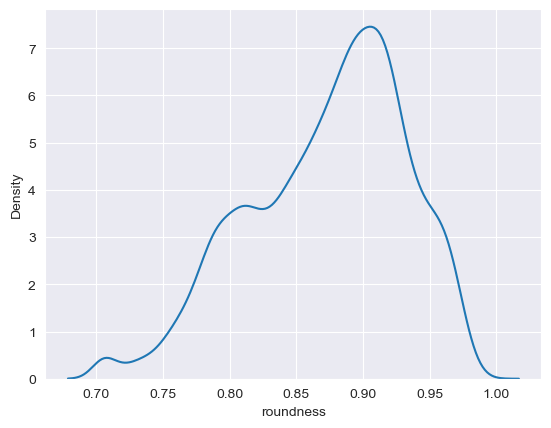

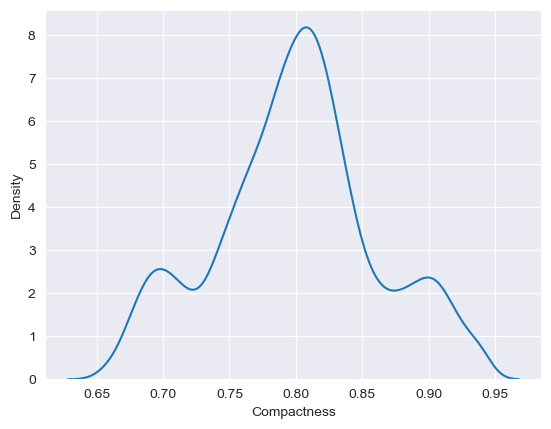

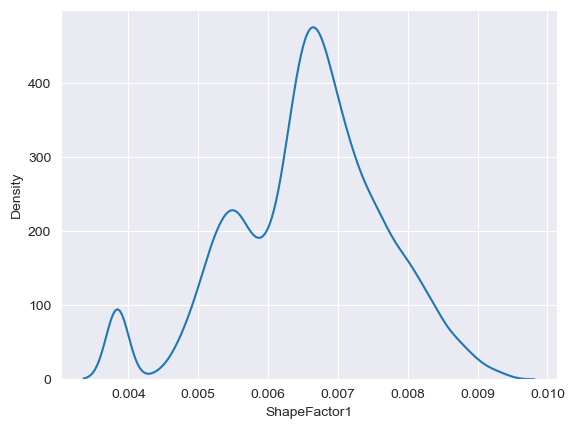

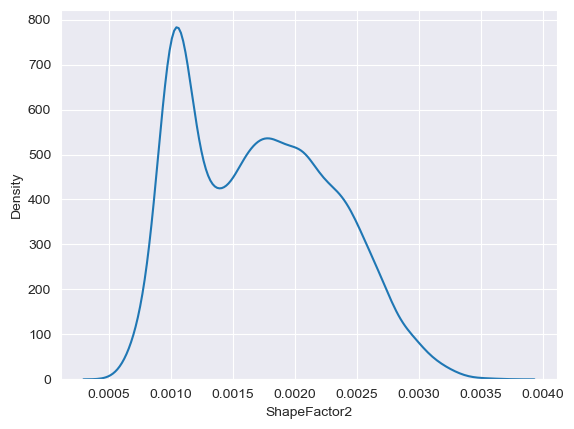

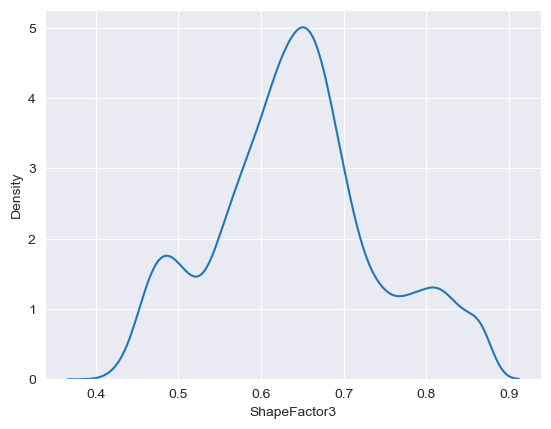

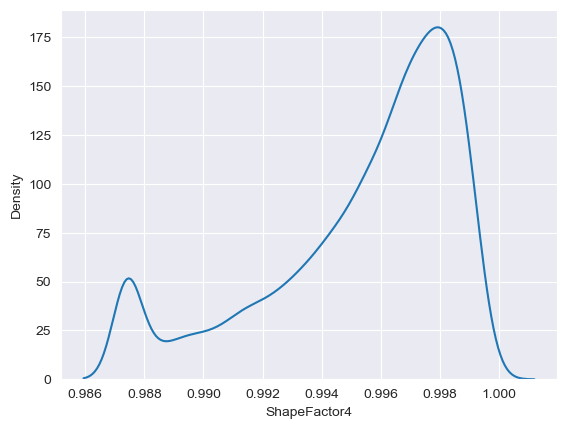

In [60]:
cols=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

for col in cols:
    sns.kdeplot(x=col,data=df)
    plt.show()

# Creating a backup file

In [61]:
df1=df.copy(deep=True)

# Separating the independent and dependent variables

In [62]:
X=df1.drop('Class',axis=1)
y=df1['Class']

# PCA

In [63]:
##Scaling the data

In [64]:
sc=StandardScaler()

In [65]:
X_scaled=sc.fit_transform(X)
df_X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
df_X_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-1.158101,-1.256001,-1.374254,-0.754477,-1.593134,-2.164759,-1.154929,-1.253256,0.288191,0.391994,1.443596,1.857674,0.693595,2.402173,1.945927,1.029778
1,-1.140074,-1.109279,-1.469528,-0.484128,-2.007702,-2.164759,-1.131110,-1.229363,0.704930,-0.690705,0.230145,1.820194,0.368513,3.100893,2.289880,0.940447
2,-1.105722,-1.182876,-1.316393,-0.692055,-1.541139,-2.164759,-1.104111,-1.184218,0.583210,0.588587,1.269635,1.782713,0.612893,2.235091,1.860826,1.133925
3,-1.072327,-1.067655,-1.344628,-0.490788,-1.773991,-2.164759,-1.050218,-1.140804,0.678177,-2.321377,0.519054,2.102521,0.403587,2.515075,2.226874,-0.347204
4,-1.065308,-1.203915,-1.453058,-0.253535,-2.159512,-2.164759,-1.066219,-1.131737,0.478946,0.961891,1.902527,2.305488,0.109027,3.270983,2.289880,1.164331


In [66]:
pca=PCA()

In [67]:
pca_bean1=pca.fit_transform(df_X_scaled)
pca_bean1

array([[-5.37907676e+00,  1.49256523e+00,  8.05129853e-01, ...,
         1.57693974e-02,  6.18573831e-03, -4.31790987e-04],
       [-5.13167881e+00,  1.83690212e+00,  2.07679235e+00, ...,
        -1.34135749e-02,  6.13869219e-02,  5.32388524e-03],
       [-5.18298258e+00,  1.57257501e+00,  5.04672919e-01, ...,
         2.05514520e-02,  5.70299299e-03, -1.22786243e-04],
       ...,
       [-1.51189729e+00,  1.09325464e-01, -3.68176512e-01, ...,
         4.61183145e-03, -2.41154359e-03,  2.34411548e-04],
       [-1.14100397e+00, -2.52397280e-01,  3.63954522e-01, ...,
         2.59355576e-03, -1.67838764e-03, -1.10628195e-03],
       [-8.68438325e-01, -7.17942890e-01, -1.15996805e+00, ...,
         6.60612769e-04,  2.03918918e-05,  1.47849653e-03]])

In [68]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.59211329 0.83502541 0.90238937 0.95302742 0.98208838 0.98979978
 0.99357789 0.99604012 0.99791299 0.99908356 0.99961799 0.99985765
 0.99993493 0.99998624 0.99999781 1.        ]


In [69]:
df_pca_bean1=pd.DataFrame(pca_bean1[:,:6])
df_pca_bean1.head()

,0,1,2,3,4,5
0,-5.379077,1.492565,0.805130,-0.202721,-0.036653,0.182651
1,-5.131679,1.836902,2.076792,0.303066,0.908518,0.731264
2,-5.182983,1.572575,0.504673,-0.021327,0.142205,0.342330
3,-4.373177,1.642209,3.636093,1.001162,0.244770,0.103306
4,-5.908095,2.687335,0.514634,-0.339288,-0.287660,0.225418


In [70]:
#checking for correlation

In [71]:
vcorr=df_pca_bean1.corr()

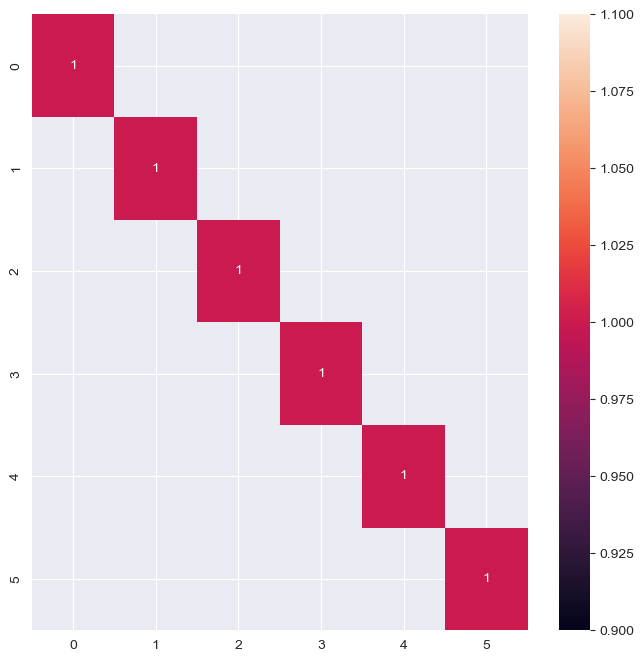

In [72]:
plt.figure(figsize=(8,8))
sns.heatmap(vcorr[(vcorr>0.85) | (vcorr<-0.85)],annot=True)
plt.show()

We can find that the high correlation which existed earlier has been treated now.

# Splitting into train and test set

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [74]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((10888, 16), (2723, 16), (10888,), (2723,))

In [75]:
#Checking the y_train

In [76]:
y_train.value_counts()

DERMASON    2841
SIRA        2115
SEKER       1622
HOROZ       1542
CALI        1297
BARBUNYA    1052
BOMBAY       419
Name: Class, dtype: int64

We can find that this is an imbalanced class. We need to balance it using SMOTE.

# SMOTE (Balancing the target class)

In [77]:
oversample=SMOTE()

In [78]:
X_train,y_train=oversample.fit_resample(X_train,y_train)

In [79]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((19887, 16), (2723, 16), (19887,), (2723,))

In [80]:
y_train.value_counts()

BARBUNYA    2841
SIRA        2841
CALI        2841
HOROZ       2841
DERMASON    2841
SEKER       2841
BOMBAY      2841
Name: Class, dtype: int64

# Label Encoding the target variable

In [81]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


In [82]:
y_train=le.fit_transform(y_train)

In [83]:
y_test=le.fit_transform(y_test)

# Scaling the data

In [84]:
sc=StandardScaler()

In [85]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

# Selecting the best parameters

In [86]:
#GridSearchCV

In [87]:
rf=RandomForestClassifier()
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [88]:
tuned_parameters={'n_estimators':[85,100],'min_samples_split':[15,20],'max_depth':[8,10]}

In [89]:
from sklearn.model_selection import GridSearchCV


gs_model = GridSearchCV(estimator=rf, param_grid=tuned_parameters, cv=5)
gs_model.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10], 'min_samples_split': [15, 20],
                         'n_estimators': [85, 100]})

In [90]:
print('best parameters are: ',gs_model.best_params_)

best parameters are:  {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 100}


In [91]:
#finding the no. of neighbors for KNN classifier

In [92]:
k_values=range(3,21)

In [93]:
acc_score={}

In [94]:
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred=knn.predict(X_test_scaled)
    acc_score[k]=accuracy_score(y_test,y_pred)

In [95]:
max(acc_score.values())

0.9346309217774513

In [96]:
max(acc_score,key=acc_score.get)

6

# Model Building

In [101]:
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


In [102]:
models=[DecisionTreeClassifier(),RandomForestClassifier(),
        RandomForestClassifier(n_estimators=100,min_samples_split=15,max_depth=10),XGBClassifier(dual=False),
       KNeighborsClassifier(n_neighbors=8),AdaBoostClassifier(),GradientBoostingClassifier(),
       SVC(kernel='linear'),SVC(kernel='rbf'),SVC(kernel='sigmoid'),SVC(kernel='poly'),GaussianNB()]

In [ ]:
for i in range(14):
    models[i].fit(X_train_scaled,y_train)
    
    print(f'{models[i]}: ')
    y_pred=models[i].predict(X_test_scaled)
    
    print('Accuracy: ',accuracy_score(y_test,y_pred))
    
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test,y_pred))
    
    print('Classification Report: ')
    print(classification_report(y_test,y_pred))
    print()

DecisionTreeClassifier(): 
Accuracy:  0.8975394785163423
Confusion Matrix: 
[[241   0  19   1   2   3   4]
 [  0 103   0   0   0   0   0]
 [ 19   0 300   0  12   0   2]
 [  0   0   0 627   4   9  65]
 [  1   0   7   2 363   0  13]
 [  5   0   3  10   0 375  12]
 [  3   0   7  49  17  10 435]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       270
           1       1.00      1.00      1.00       103
           2       0.89      0.90      0.90       333
           3       0.91      0.89      0.90       705
           4       0.91      0.94      0.93       386
           5       0.94      0.93      0.94       405
           6       0.82      0.83      0.83       521

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723


RandomForestClassifier(): 
Accuracy:  0.9342636797649652
Confusion Matrix: 
[[248   